In [1]:
import sys
sys.path.insert(0, '..')
import time
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib notebook  
import numpy as np

from Configuration import Configuration
from MotorUnitPool import MotorUnitPool
from AfferentPool import AfferentPool
from SynapsesFactory import SynapsesFactory

In [2]:
conf = Configuration('confH-ReflexM-WaveCurve.rmto')

In [3]:
t = np.arange(0.0, conf.simDuration_ms, conf.timeStep_ms)
Nsim = 20
FirstStim = 8.0
LastStim = 20.0
Mp = np.zeros((Nsim, 1))
Hp = np.zeros((Nsim, 1))
Stim = np.zeros((Nsim, 1))
emg = np.zeros([len(t), Nsim])

pools = dict()
pools[0] = MotorUnitPool(conf, 'SOL')
pools[1] = AfferentPool(conf,'Ia', 'SOL')
pools[2]= AfferentPool(conf,'Ia', 'LG')
Syn = SynapsesFactory(conf, pools)
del Syn 

Motor Unit Pool SOL built
Afferent Pool Ia of muscle SOL built
Afferent Pool Ia of muscle LG built
All the 345589 synapses were built


In [4]:
for j  in xrange(0, Nsim):
    Stim[j] = FirstStim + j * (LastStim - FirstStim) / (Nsim - 1)
    conf.changeConfigurationParameter('stimIntensity_PTN', FirstStim + j * (LastStim - FirstStim) / (Nsim - 1),'')
    for k in xrange(0, len(pools)):
        for i in xrange(0,len(pools[k].unit)):
            pools[k].unit[i].createStimulus()
    tic = time.clock()
    for i in xrange(0, len(t)-1):
        pools[0].atualizeMotorUnitPool(t[i])
        pools[1].atualizeAfferentPool(t[i])
        pools[2].atualizeAfferentPool(t[i])
    toc = time.clock()
    print str(toc - tic) + ' seconds'
    pools[0].getMotorUnitPoolEMG()
    Mp[j] = np.max(pools[0].emg[t<20]) - np.min(pools[0].emg[t<20])
    Hp[j] = np.max(pools[0].emg[t>20]) - np.min(pools[0].emg[t>20])
    print Mp[j]
    print Hp[j]
    emg[:,[j]] = pools[0].emg
    for k in xrange(0, len(pools)):
        pools[k].reset()

68.553551 seconds
[ 0.]
[ 0.]
70.486759 seconds
[ 0.]
[ 0.]
70.621872 seconds
[ 0.]
[ 0.]
70.991489 seconds
[ 0.]
[ 0.]
70.987521 seconds
[ 0.]
[ 0.]
71.149466 seconds
[ 0.]
[ 0.03749432]
70.984088 seconds
[ 0.]
[ 0.34100887]
71.60818 seconds
[ 0.]
[ 1.05039352]
72.032296 seconds
[ 1.23962447]
[ 1.82059584]
72.03615 seconds
[ 1.95803869]
[ 2.75760703]
72.574963 seconds
[ 2.74078718]
[ 2.77745469]
72.970552 seconds
[ 3.56466402]
[ 1.95245832]
73.584954 seconds
[ 4.08015933]
[ 1.38534899]
73.623133 seconds
[ 4.43726821]
[ 0.9406432]
74.175656 seconds
[ 4.74622602]
[ 0.54450195]
74.183261 seconds
[ 4.94548718]
[ 0.24667138]
74.435355 seconds
[ 5.03125275]
[ 0.10130049]
74.629875 seconds
[ 5.07542145]
[ 0.00619096]
74.96489 seconds
[ 5.08341171]
[  1.63163044e-07]
75.033999 seconds
[ 5.09644704]
[  1.45164918e-07]


<IPython.core.display.Javascript object>


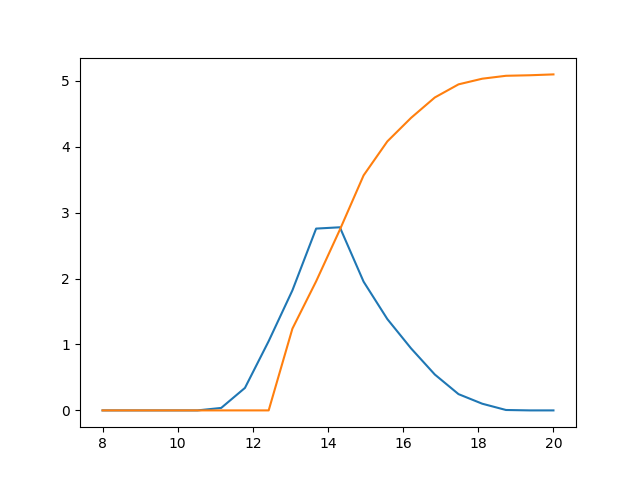

In [5]:
plt.figure()
plt.plot(Stim, Hp, Stim, Mp)

In [6]:
np.max(Hp)/np.max(Mp)

0.54497862356069859

In [7]:
Mp

array([[ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 1.23962447],
       [ 1.95803869],
       [ 2.74078718],
       [ 3.56466402],
       [ 4.08015933],
       [ 4.43726821],
       [ 4.74622602],
       [ 4.94548718],
       [ 5.03125275],
       [ 5.07542145],
       [ 5.08341171],
       [ 5.09644704]])

<IPython.core.display.Javascript object>


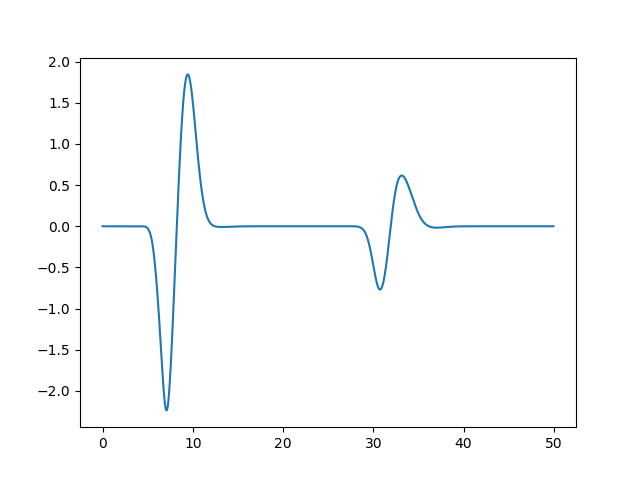

In [8]:
plt.figure()
plt.plot(t, emg[:,12])